In [1]:
import numpy as np
import matplotlib.pyplot as plt
# lets first generate a dataset of 100 points this time

np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [2]:
X.shape,y.shape

((100, 1), (100, 1))

In [3]:
x_tr_cv , xtest,y_tr_cv,ytest = train_test_split(X,y,test_size=0.2,random_state=1)
xtrain,x_val,ytrain,y_val = train_test_split(x_tr_cv,y_tr_cv,test_size=0.25,random_state=1)

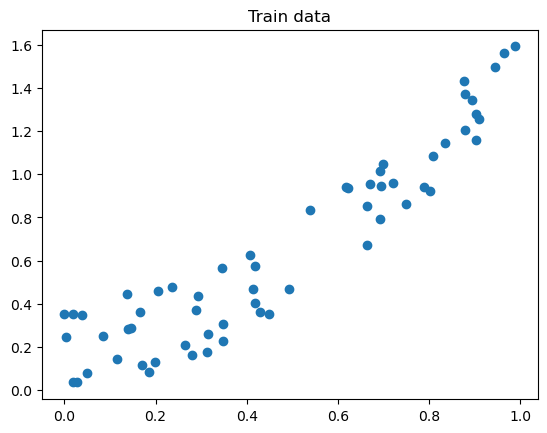

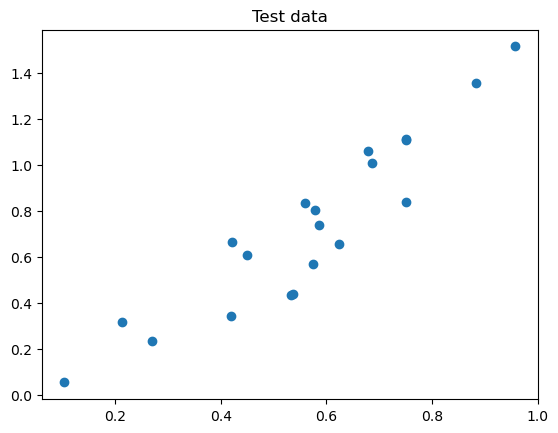

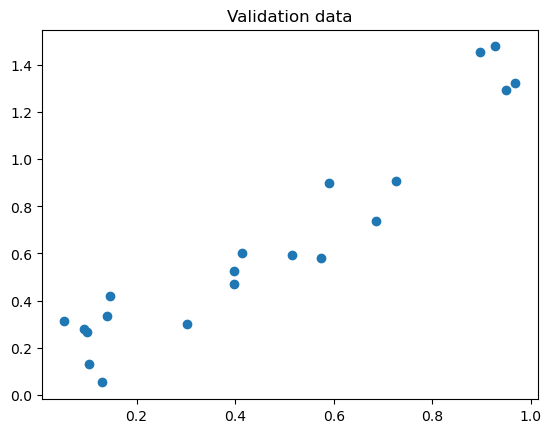

In [4]:
plt.title('Train data')
plt.scatter(xtrain,ytrain)
plt.show()

plt.title('Test data')
plt.scatter(xtest,ytest)
plt.show()

plt.title('Validation data')
plt.scatter(x_val,y_val)
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

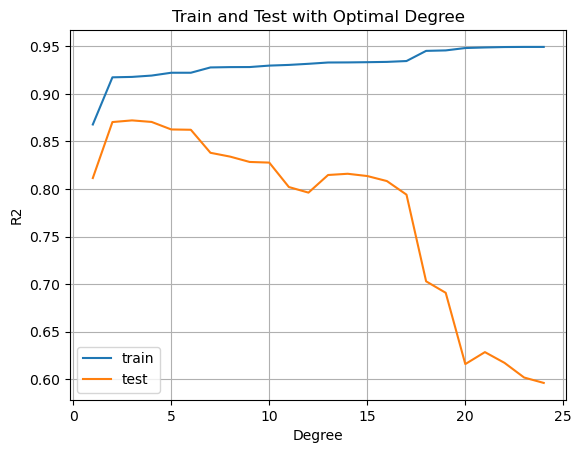

In [6]:
max_degree = 25
train_res = []
test_res = []
scaler = StandardScaler()
for degree in range(1,max_degree):
    poly_reg = make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
    poly_reg.fit(xtrain,ytrain)
    train_res.append(poly_reg.score(xtrain,ytrain))
    test_res.append(poly_reg.score(xtest,ytest))

plt.title('Train and Test with Optimal Degree')
plt.plot(range(1,max_degree),train_res,label='train')
plt.plot(range(1,max_degree),test_res,label='test')
plt.grid(which='both')
plt.ylabel('R2')
plt.xlabel('Degree')
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import KFold

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('churn_logistic.csv')

In [10]:
df

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,224,0,171.5,160.0,212.4,5.0,1,1,0,99,...,103,13.60,102,9.56,2,1.35,DE,510,361-6563,1
5696,131,0,131.6,179.3,251.2,15.5,1,0,0,95,...,109,15.24,129,11.30,3,4.19,MS,415,333-9002,1
5697,132,0,291.2,234.2,191.7,8.9,1,0,0,104,...,132,19.91,87,8.63,3,2.40,MI,408,389-4608,1
5698,100,0,113.3,197.9,284.5,11.7,4,0,0,96,...,89,16.82,93,12.80,2,3.16,MT,415,341-4873,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

In [12]:
df['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

In [13]:
import seaborn as sns

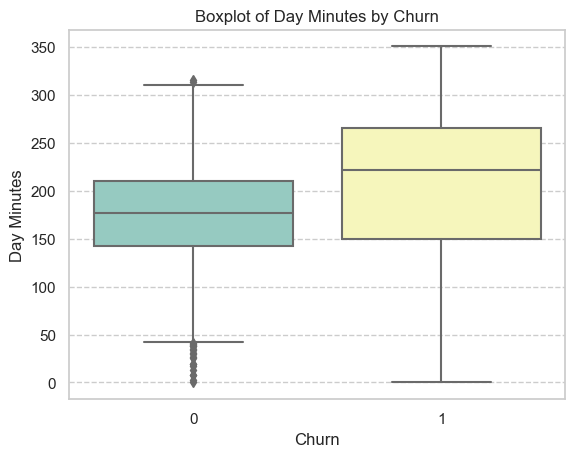

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a boxplot with 'Day Mins' on the y-axis and 'Churn' on the x-axis
sns.boxplot(data=df, y='Day Mins', x='Churn', palette='Set3')

# Add grid for better visibility
plt.grid(axis='y', linestyle='--', alpha=1)

# Set labels and title
plt.xlabel('Churn')
plt.ylabel('Day Minutes')
plt.title('Boxplot of Day Minutes by Churn')


# Show the plot
plt.show()


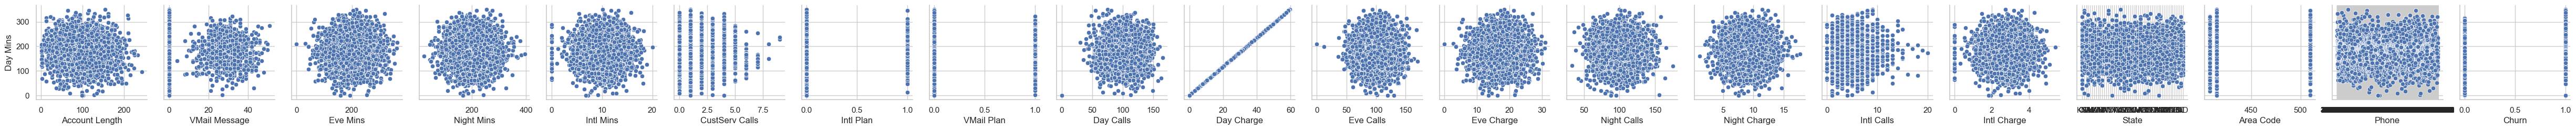

In [15]:
x_vars = [
'Account Length',
 'VMail Message',
 'Eve Mins',
 'Night Mins',
 'Intl Mins',
 'CustServ Calls',
 'Intl Plan',
 'VMail Plan',
 'Day Calls',
 'Day Charge',
 'Eve Calls',
 'Eve Charge',
 'Night Calls',
 'Night Charge',
 'Intl Calls',
 'Intl Charge',
 'State',
 'Area Code',
 'Phone',
 'Churn'    
]
y_vars = ['Day Mins']

sns.pairplot(data=df,x_vars=x_vars,y_vars=y_vars)

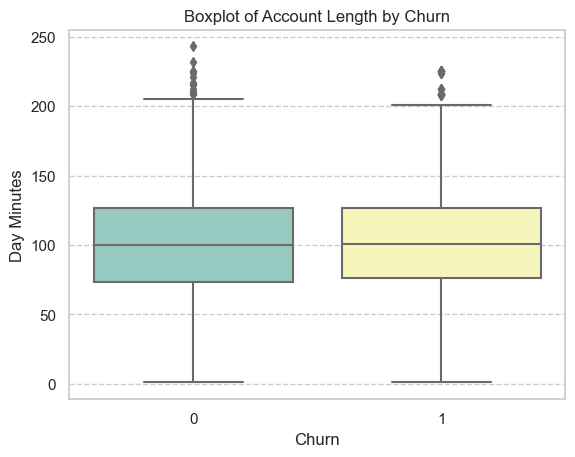

In [16]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a boxplot with 'Day Mins' on the y-axis and 'Churn' on the x-axis
sns.boxplot(data=df, y='Account Length', x='Churn', palette='Set3')

# Add grid for better visibility
plt.grid(axis='y', linestyle='--', alpha=1)

# Set labels and title
plt.xlabel('Churn')
plt.ylabel('Day Minutes')
plt.title('Boxplot of Account Length by Churn')


# Show the plot
plt.show()


In [17]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [37]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a boxplot with 'Day Mins' on the y-axis and 'Churn' on the x-axis
sns.boxplot(data=df, y='Intl Mins', x='Churn', palette='Set3')

# Add grid for better visibility
#plt.grid(axis='y', linestyle='--', alpha=1)

# Set labels and title
plt.xlabel('Churn')
plt.ylabel('Intl Mins')
plt.title('Boxplot of Night Mins by Churn')


# Show the plot
plt.show()

ValueError: Could not interpret input 'Churn'

In [19]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']
Y = df["Churn"]
X = df[cols]
X.shape

(5700, 5)

In [20]:
x_tr_cv , xtest , y_tr_cv , y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

xtrain,xval,ytrain,yval = train_test_split(x_tr_cv,y_tr_cv,test_size=0.25,random_state=1)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# scaler = StandardScaler()
# scaler.fit(xtrain)

# xtrain = scaler.transform(xtrain)
# xtest = scaler.transform(xtest)
# xval = scaler.transform(xval)

# model = LogisticRegression()
# model.fit(xtrain,ytrain)

# Hyper parameter Tuning

In [23]:
train_score = []
test_score = []
scaler = StandardScaler()
for lm in np.arange(0.01,12000.0,100):
    model = make_pipeline(scaler,LogisticRegression(C=1/lm))
    model.fit(xtrain,ytrain)
    train_score.append(model.score(xtrain,ytrain))
    test_score.append(model.score(xval,yval))

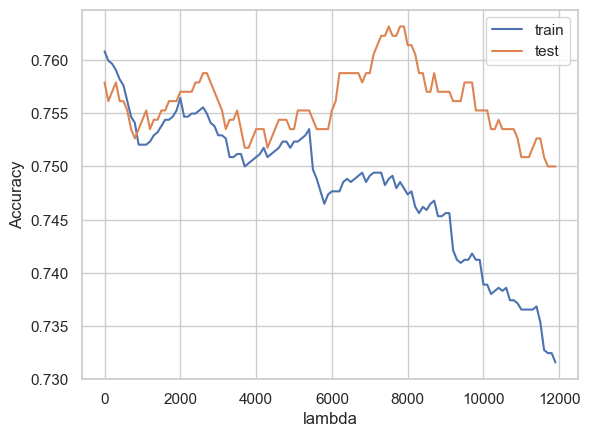

In [24]:
plt.plot(list(np.arange(0.01,12000.0,100)),train_score,label='train')
plt.plot(list(np.arange(0.01,12000.0,100)),test_score,label='test')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.legend()

In [25]:
test_score[np.argmax(test_score)],np.argmax(test_score)

(0.7631578947368421, 75)

In [26]:
df = pd.read_csv('pred_data.csv')

In [31]:
df

,y,proba,pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0
...,...,...,...
10095,0.0,0.474401,0
10096,0.0,0.128403,0
10097,0.0,0.499331,0
10098,0.0,0.157616,0


In [28]:
df['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [33]:
def get_label(value):
    if(value <0.5):
        return 0.0
    return 1.0
df['pred'] = df['proba'].apply(get_label)

In [34]:
df['pred'].value_counts()

0.0    9806
1.0     294
Name: pred, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

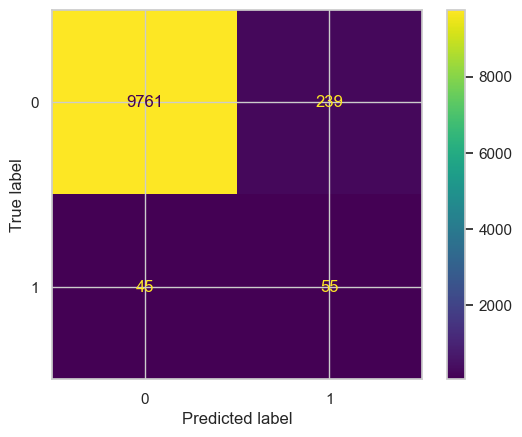

In [38]:
con_matrix = confusion_matrix(df['y'],df['pred'])
ConfusionMatrixDisplay(con_matrix).plot()